<a href="https://colab.research.google.com/github/kr-nihcas/files/blob/main/covid_19_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

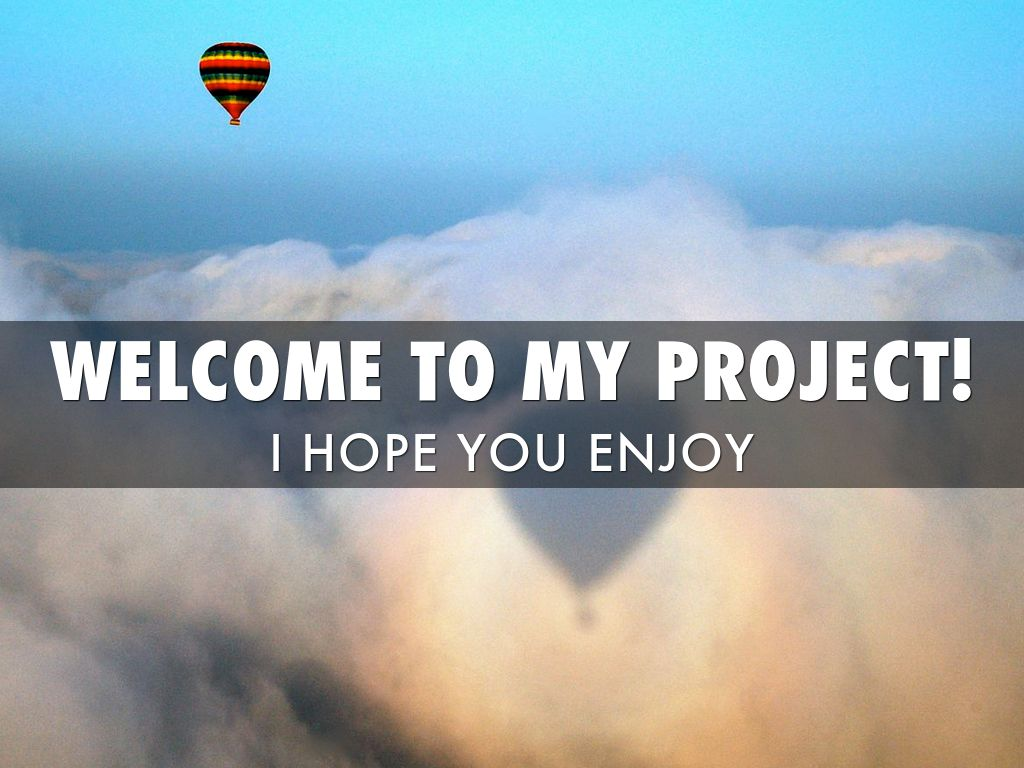

# **Covid 19 Analysis and Forecasting **

link for the dataset used:-https://covid.ourworldindata.org/data/owid-covid-data.csv

In [3]:
# DATA SCIENCE PROJECT
# COVID-19 PANDEMIC ANALYSIS
####
#Imporing the required libraries
import pandas as pd
covid=pd.read_csv('/content/drive/MyDrive/DATASET/owid-covid-data (3).csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Having a glance at some of the records
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [6]:
# Data Analysis
#checking the column names
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
#checking at the shape 
covid.shape

(102257, 60)

In [8]:
#checking for any null values in columns
covid.isnull().sum()

iso_code                                      0
continent                                  4777
location                                      0
date                                          0
total_cases                                3864
new_cases                                  3867
new_cases_smoothed                         4877
total_deaths                              14080
new_deaths                                13924
new_deaths_smoothed                        4877
total_cases_per_million                    4387
new_cases_per_million                      4390
new_cases_smoothed_per_million             5395
total_deaths_per_million                  14590
new_deaths_per_million                    14434
new_deaths_smoothed_per_million            5395
reproduction_rate                         20030
icu_patients                              91998
icu_patients_per_million                  91998
hosp_patients                             89519
hosp_patients_per_million               

In [9]:
covid['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [10]:
 ## PREPROCESSING THE DATA

#creating the other New_dataframe of selected information
covid_df=covid[['location','date','continent','total_cases', 'new_cases','total_deaths', 'new_deaths','new_tests', 'total_tests','total_vaccinations',
       'people_vaccinated','people_fully_vaccinated','new_vaccinations']]
covid_df.head() 	

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,Afghanistan,2020-02-24,Asia,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-02-25,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-02-26,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-02-27,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-02-28,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
covid_df.shape

(102257, 13)

**India**

In [12]:
#Getting required information of India into a new dataframe
india_case=covid_df[covid_df['location']=='India']
india_case.head()

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
42294,India,2020-01-30,Asia,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42295,India,2020-01-31,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42296,India,2020-02-01,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42297,India,2020-02-02,Asia,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42298,India,2020-02-03,Asia,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
india_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 42294 to 42824
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 531 non-null    object 
 1   date                     531 non-null    object 
 2   continent                531 non-null    object 
 3   total_cases              531 non-null    float64
 4   new_cases                531 non-null    float64
 5   total_deaths             490 non-null    float64
 6   new_deaths               490 non-null    float64
 7   new_tests                462 non-null    float64
 8   total_tests              472 non-null    float64
 9   total_vaccinations       174 non-null    float64
 10  people_vaccinated        174 non-null    float64
 11  people_fully_vaccinated  145 non-null    float64
 12  new_vaccinations         168 non-null    float64
dtypes: float64(10), object(3)
memory usage: 58.1+ KB


In [14]:
# checking the final null values
india_case.isnull().sum()

location                     0
date                         0
continent                    0
total_cases                  0
new_cases                    0
total_deaths                41
new_deaths                  41
new_tests                   69
total_tests                 59
total_vaccinations         357
people_vaccinated          357
people_fully_vaccinated    386
new_vaccinations           363
dtype: int64

In [15]:
india_case.tail()

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
42820,India,2021-07-09,Asia,30795716.0,42766.0,407145.0,1206.0,1790708.0,427016605.0,NaN,NaN,NaN,NaN
42821,India,2021-07-10,Asia,30837222.0,41506.0,408040.0,895.0,2025365.0,429041970.0,376032586.0,303171498.0,72861088.0,NaN
42822,India,2021-07-11,Asia,30874376.0,37154.0,408764.0,724.0,1843500.0,430885470.0,377352501.0,304018852.0,73333649.0,1319915.0
42823,India,2021-07-12,Asia,30874376.0,0.0,408764.0,0.0,1432343.0,432317813.0,381467646.0,306612781.0,74854865.0,4115145.0
42824,India,2021-07-13,Asia,30946147.0,71771.0,411406.0,2642.0,1740325.0,434058138.0,387697935.0,311387539.0,76310396.0,6230289.0


In [16]:
# ds- Date 
# y - new_cases
# Rename the columns  in dataframe as above mentioned
india_case=india_case.rename(columns={'date':'ds','new_cases':'y'})

In [17]:
india_case=india_case[['ds','y']]

In [18]:
india_case

,ds,y
42294,2020-01-30,1.0
42295,2020-01-31,0.0
42296,2020-02-01,0.0
42297,2020-02-02,1.0
42298,2020-02-03,1.0
...,...,...
42820,2021-07-09,42766.0
42821,2021-07-10,41506.0
42822,2021-07-11,37154.0
42823,2021-07-12,0.0


In [19]:
# Converting into respective datatypes required
# Droping all the unwanted columns 
india_case['ds']=pd.to_datetime(india_case['ds'])
india_case['y']=india_case['y'].astype(int)

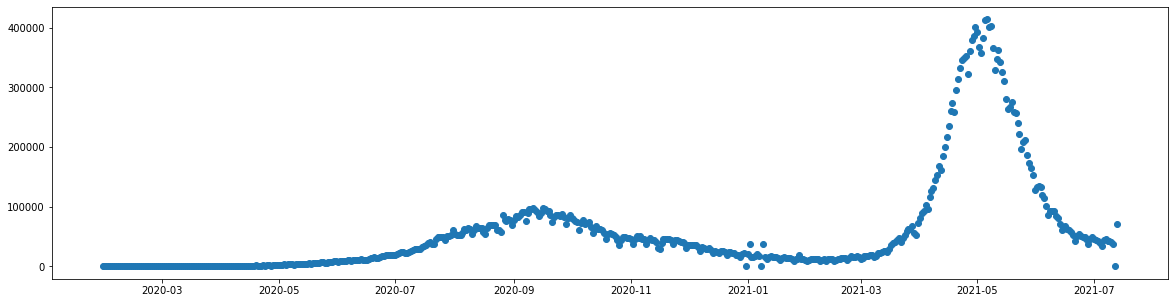

In [20]:
# Plotting and analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(india_case['ds'],india_case['y'])

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


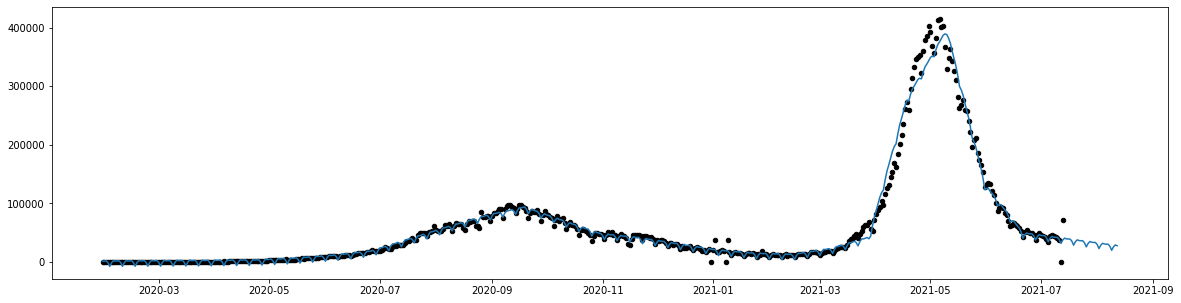

In [21]:
# Forcasting the data of India cases for 30days
from fbprophet import Prophet
model_india_new_cases=Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.999)
model_india_new_cases.fit(india_case)
future = model_india_new_cases.make_future_dataframe(periods=30,freq='D')
forecast_india_new_cases = model_india_new_cases.predict(future)
plt.figure(figsize=(20,5))
plt.plot(forecast_india_new_cases['ds'],forecast_india_new_cases['yhat'])
plt.scatter(india_case['ds'],india_case['y'],s=20,c='k')


In [22]:
 forecast_india_new_cases[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,1251.523695,-15498.812926,19275.263820
1,2020-01-31,1416.859930,-14629.157024,18512.592064
2,2020-02-01,1835.894982,-15707.262819,17947.495463
3,2020-02-02,-1247.742809,-18933.241183,17147.547402
4,2020-02-03,-7759.244978,-24588.485210,9043.064188
...,...,...,...,...
556,2021-08-08,26775.595787,-56924.839898,97695.093772
557,2021-08-09,19826.715013,-68934.228902,93373.704234
558,2021-08-10,25700.137064,-62619.440417,103350.781986
559,2021-08-11,28880.981753,-69098.528755,112772.943886


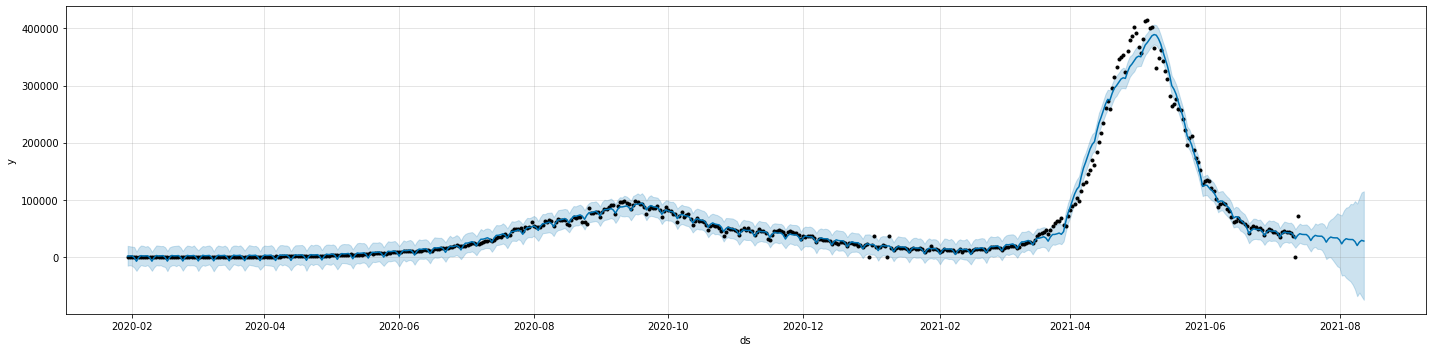

In [23]:
model_india_new_cases.plot(forecast_india_new_cases,figsize=(20,5));

FORECASTING FOR **ASIA**

In [24]:
#Getting required information of India into a new dataframe
Asia_case=covid_df[covid_df['location']=='Asia']
Asia_case.head()

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
4824,Asia,2020-01-22,NaN,556.0,0.0,17.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4825,Asia,2020-01-23,NaN,654.0,98.0,18.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4826,Asia,2020-01-24,NaN,937.0,283.0,26.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4827,Asia,2020-01-25,NaN,1428.0,491.0,42.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
4828,Asia,2020-01-26,NaN,2105.0,677.0,56.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# ds- Date 
# y - new_cases
# Rename the columns  in dataframe as above mentioned
Asia_case=Asia_case.rename(columns={'date':'ds','new_cases':'y'})

In [26]:
Asia_case=Asia_case[['ds','y']]
Asia_case

,ds,y
4824,2020-01-22,0.0
4825,2020-01-23,98.0
4826,2020-01-24,283.0
4827,2020-01-25,491.0
4828,2020-01-26,677.0
...,...,...
5358,2021-07-09,177085.0
5359,2021-07-10,169531.0
5360,2021-07-11,170550.0
5361,2021-07-12,146055.0


In [27]:
# Converting into respective datatypes required
# Droping all the unwanted columns 
Asia_case['ds']=pd.to_datetime(Asia_case['ds'])
Asia_case['y']=Asia_case['y'].astype(int)

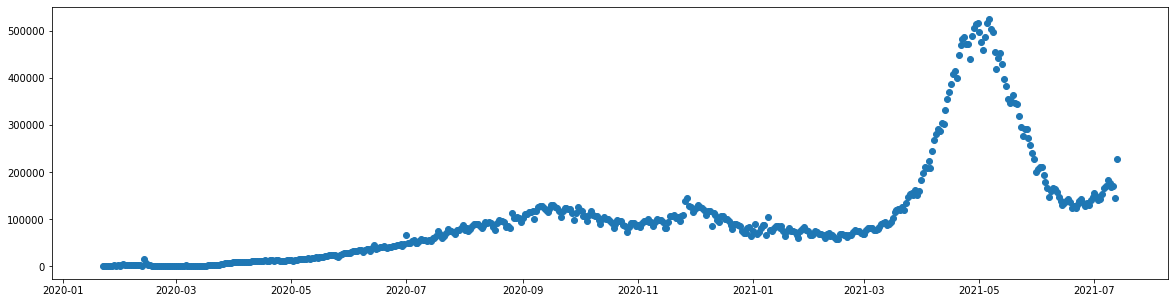

In [28]:
# Plotting and analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(Asia_case['ds'],Asia_case['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


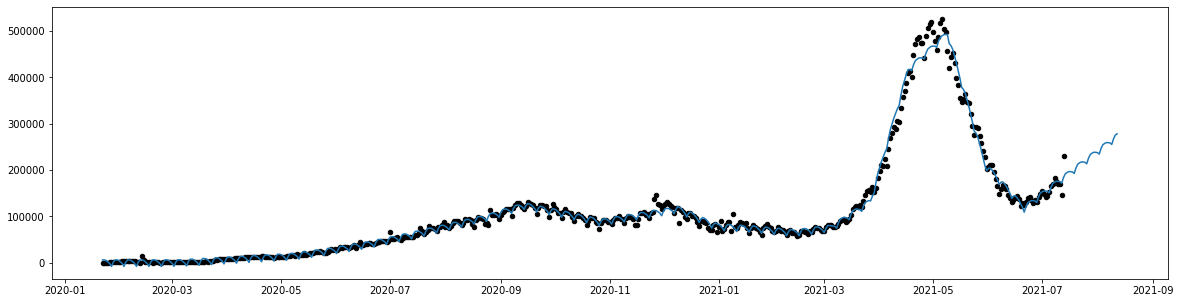

In [29]:
# Forcasting the data of India cases for 30days
from fbprophet import Prophet
model_Asia_new_cases=Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.999)
model_Asia_new_cases.fit(Asia_case)
future = model_Asia_new_cases.make_future_dataframe(periods=30,freq='D')
forecast_Asia_new_cases = model_Asia_new_cases.predict(future)
plt.figure(figsize=(20,5))
plt.plot(forecast_Asia_new_cases['ds'],forecast_Asia_new_cases['yhat'])
plt.scatter(Asia_case['ds'],Asia_case['y'],s=20,c='k')

In [30]:
 forecast_Asia_new_cases[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,6167.801393,-11525.391126,24815.882637
1,2020-01-23,5994.668252,-11143.069644,23821.669785
2,2020-01-24,4961.935908,-12744.251919,23520.609052
3,2020-01-25,1772.211426,-15338.580585,20381.688176
4,2020-01-26,-1737.209185,-17982.494036,15492.312904
...,...,...,...,...
564,2021-08-08,258544.267755,161489.750884,364214.715815
565,2021-08-09,255266.476008,159331.619141,364523.156776
566,2021-08-10,267355.822849,165771.340921,380989.375093
567,2021-08-11,275418.892070,160868.639176,391309.876097


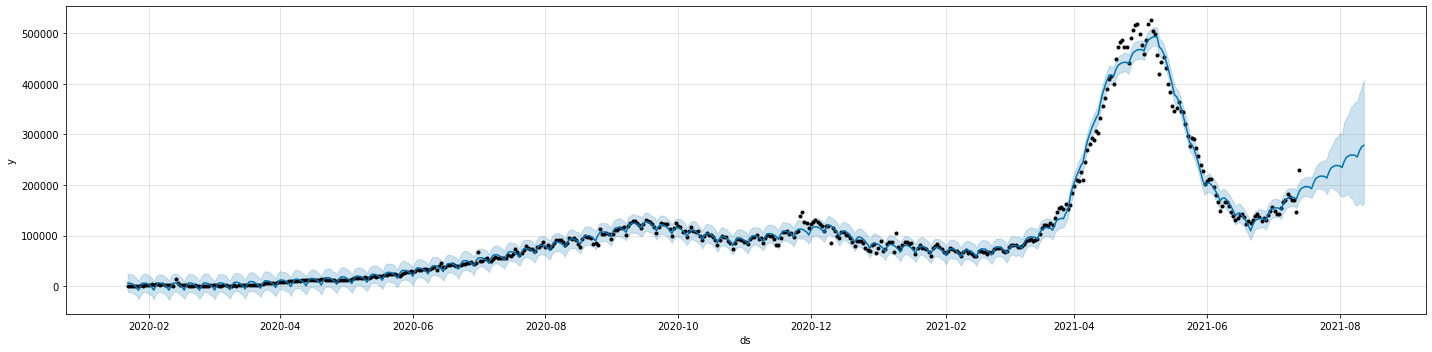

In [31]:
# showing the yhat-lower and yhat-upper in the graph 
model_Asia_new_cases.plot(forecast_Asia_new_cases,figsize=(20,5));

## **forming a final dataset containing final value** 

In [32]:
#data on date 2021-07-13
final_dataset=covid_df[covid_df['date']=='2021-07-13']
final_dataset

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
505,Afghanistan,2021-07-13,Asia,134653.0,0.0,5791.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1022,Africa,2021-07-13,NaN,6022811.0,38239.0,153491.0,1085.0,NaN,NaN,5.732385e+07,3.933676e+07,18586414.0,482866.0
1527,Albania,2021-07-13,Europe,132608.0,11.0,2456.0,0.0,NaN,NaN,1.035667e+06,5.925020e+05,443165.0,6433.0
2032,Algeria,2021-07-13,Africa,147883.0,941.0,3867.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2531,Andorra,2021-07-13,Europe,14167.0,12.0,127.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100293,Wallis and Futuna,2021-07-13,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,9.112000e+03,4.610000e+03,4502.0,NaN
100832,World,2021-07-13,NaN,187794140.0,531553.0,4048746.0,9671.0,NaN,NaN,3.505642e+09,1.996509e+09,968206850.0,32157299.0
101292,Yemen,2021-07-13,Asia,6961.0,9.0,1366.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
101775,Zambia,2021-07-13,Africa,178748.0,2006.0,2904.0,37.0,9021.0,1977464.0,2.109920e+05,1.645030e+05,46489.0,13248.0


# **order for total cases**

In [33]:
#sorting value in descending order
final_dataset=final_dataset.sort_values(['total_cases'],ascending=False)
final_dataset.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
100832,World,2021-07-13,NaN,187794140.0,531553.0,4048746.0,9671.0,NaN,NaN,3.505642e+09,1.996509e+09,968206850.0,32157299.0
5362,Asia,2021-07-13,NaN,57976900.0,229409.0,826151.0,4606.0,NaN,NaN,2.192073e+09,1.196125e+09,427419657.0,22534909.0
31271,Europe,2021-07-13,NaN,49446174.0,137558.0,1117725.0,1069.0,NaN,NaN,5.701203e+08,3.349616e+08,245407036.0,6369261.0
68142,North America,2021-07-13,NaN,40170629.0,53880.0,909514.0,791.0,NaN,NaN,4.581594e+08,2.630600e+08,207041309.0,925870.0
85539,South America,2021-07-13,NaN,34113273.0,71710.0,1040673.0,2119.0,NaN,NaN,2.163542e+08,1.545995e+08,66567031.0,1609358.0
97440,United States,2021-07-13,North America,33914880.0,25919.0,607771.0,372.0,NaN,NaN,3.349422e+08,1.845438e+08,159675163.0,341466.0
31809,European Union,2021-07-13,NaN,33182879.0,74286.0,741751.0,186.0,NaN,NaN,4.128314e+08,2.432701e+08,179797733.0,5267225.0
42824,India,2021-07-13,Asia,30946147.0,71771.0,411406.0,2642.0,1740325.0,434058138.0,3.876979e+08,3.113875e+08,76310396.0,6230289.0
13498,Brazil,2021-07-13,South America,19151993.0,45022.0,535838.0,1605.0,NaN,NaN,1.170052e+08,8.880595e+07,31489872.0,1173057.0
1022,Africa,2021-07-13,NaN,6022811.0,38239.0,153491.0,1085.0,NaN,NaN,5.732385e+07,3.933676e+07,18586414.0,482866.0


Rest of the location above United States in upper dataset sorted in descending order wrt total cases is not a country so United States have highest total number of cases and number of total cases is 33914880.0

In [34]:
final_dataset_2=final_dataset.sort_values(['total_cases'],ascending=True)
final_dataset_2.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
60245,Micronesia (country),2021-07-13,Oceania,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49261,Kiribati,2021-07-13,Oceania,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78694,Samoa,2021-07-13,Oceania,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58541,Marshall Islands,2021-07-13,Oceania,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98660,Vanuatu,2021-07-13,Oceania,4.0,0.0,1.0,0.0,NaN,NaN,14026.0,14026.0,NaN,NaN
84023,Solomon Islands,2021-07-13,Oceania,20.0,0.0,NaN,NaN,NaN,NaN,25628.0,19641.0,5987.0,NaN
99155,Vatican,2021-07-13,Europe,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37646,Grenada,2021-07-13,North America,161.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26267,Dominica,2021-07-13,North America,199.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14040,Brunei,2021-07-13,Asia,282.0,5.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Micronesia (country) with totak cases as 1 having minimum total cases

# **order for deaths**

In [35]:
#sorting value in descending order
final_dataset_3=final_dataset.sort_values(['total_deaths'],ascending=False)
final_dataset_3.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
100832,World,2021-07-13,NaN,187794140.0,531553.0,4048746.0,9671.0,NaN,NaN,3.505642e+09,1.996509e+09,968206850.0,32157299.0
31271,Europe,2021-07-13,NaN,49446174.0,137558.0,1117725.0,1069.0,NaN,NaN,5.701203e+08,3.349616e+08,245407036.0,6369261.0
85539,South America,2021-07-13,NaN,34113273.0,71710.0,1040673.0,2119.0,NaN,NaN,2.163542e+08,1.545995e+08,66567031.0,1609358.0
68142,North America,2021-07-13,NaN,40170629.0,53880.0,909514.0,791.0,NaN,NaN,4.581594e+08,2.630600e+08,207041309.0,925870.0
5362,Asia,2021-07-13,NaN,57976900.0,229409.0,826151.0,4606.0,NaN,NaN,2.192073e+09,1.196125e+09,427419657.0,22534909.0
31809,European Union,2021-07-13,NaN,33182879.0,74286.0,741751.0,186.0,NaN,NaN,4.128314e+08,2.432701e+08,179797733.0,5267225.0
97440,United States,2021-07-13,North America,33914880.0,25919.0,607771.0,372.0,NaN,NaN,3.349422e+08,1.845438e+08,159675163.0,341466.0
13498,Brazil,2021-07-13,South America,19151993.0,45022.0,535838.0,1605.0,NaN,NaN,1.170052e+08,8.880595e+07,31489872.0,1173057.0
42824,India,2021-07-13,Asia,30946147.0,71771.0,411406.0,2642.0,1740325.0,434058138.0,3.876979e+08,3.113875e+08,76310396.0,6230289.0
60071,Mexico,2021-07-13,North America,2604711.0,11137.0,235277.0,219.0,NaN,NaN,NaN,NaN,NaN,NaN


United states with total deaths 607771.0 is having highest number of deaths

In [36]:
final_dataset_4=final_dataset.sort_values(['total_cases'],ascending=True)
final_dataset_4.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
60245,Micronesia (country),2021-07-13,Oceania,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49261,Kiribati,2021-07-13,Oceania,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78694,Samoa,2021-07-13,Oceania,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58541,Marshall Islands,2021-07-13,Oceania,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98660,Vanuatu,2021-07-13,Oceania,4.0,0.0,1.0,0.0,NaN,NaN,14026.0,14026.0,NaN,NaN
84023,Solomon Islands,2021-07-13,Oceania,20.0,0.0,NaN,NaN,NaN,NaN,25628.0,19641.0,5987.0,NaN
99155,Vatican,2021-07-13,Europe,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37646,Grenada,2021-07-13,North America,161.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26267,Dominica,2021-07-13,North America,199.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14040,Brunei,2021-07-13,Asia,282.0,5.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Vanuatu and Geranda with total deaths 1 having minimun number of people died

# **For vaccination**

In [37]:
final_dataset_5=final_dataset.sort_values(['people_vaccinated'],ascending=True)
final_dataset_5.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
100293,Wallis and Futuna,2021-07-13,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,9112.0,4610.0,4502.0,NaN
64426,Nauru,2021-07-13,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,10556.0,7502.0,3054.0,NaN
98660,Vanuatu,2021-07-13,Oceania,4.0,0.0,1.0,0.0,NaN,NaN,14026.0,14026.0,NaN,NaN
84023,Solomon Islands,2021-07-13,Oceania,20.0,0.0,NaN,NaN,NaN,NaN,25628.0,19641.0,5987.0,NaN
77969,Saint Lucia,2021-07-13,North America,5430.0,14.0,86.0,0.0,NaN,NaN,53993.0,31340.0,22653.0,138.0
37167,Greenland,2021-07-13,North America,NaN,NaN,NaN,NaN,NaN,NaN,50467.0,31935.0,18532.0,629.0
31975,Faeroe Islands,2021-07-13,Europe,NaN,NaN,NaN,NaN,NaN,NaN,57860.0,32954.0,24906.0,359.0
36488,Gibraltar,2021-07-13,Europe,NaN,NaN,NaN,NaN,NaN,NaN,78233.0,39294.0,38939.0,NaN
86544,South Sudan,2021-07-13,Africa,10911.0,20.0,117.0,0.0,NaN,NaN,55915.0,51571.0,4344.0,201.0
45538,Isle of Man,2021-07-13,Europe,NaN,NaN,NaN,NaN,NaN,NaN,115567.0,64161.0,51406.0,629.0


Wallis and Futuna with 4610.0 people vaccinated is having minimum number of people vaccinated

In [38]:
final_dataset_6=final_dataset.sort_values(['people_vaccinated'],ascending=False)
final_dataset_6.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
100832,World,2021-07-13,NaN,187794140.0,531553.0,4048746.0,9671.0,NaN,NaN,3.505642e+09,1.996509e+09,968206850.0,32157299.0
5362,Asia,2021-07-13,NaN,57976900.0,229409.0,826151.0,4606.0,NaN,NaN,2.192073e+09,1.196125e+09,427419657.0,22534909.0
31271,Europe,2021-07-13,NaN,49446174.0,137558.0,1117725.0,1069.0,NaN,NaN,5.701203e+08,3.349616e+08,245407036.0,6369261.0
42824,India,2021-07-13,Asia,30946147.0,71771.0,411406.0,2642.0,1740325.0,434058138.0,3.876979e+08,3.113875e+08,76310396.0,6230289.0
68142,North America,2021-07-13,NaN,40170629.0,53880.0,909514.0,791.0,NaN,NaN,4.581594e+08,2.630600e+08,207041309.0,925870.0
31809,European Union,2021-07-13,NaN,33182879.0,74286.0,741751.0,186.0,NaN,NaN,4.128314e+08,2.432701e+08,179797733.0,5267225.0
97440,United States,2021-07-13,North America,33914880.0,25919.0,607771.0,372.0,NaN,NaN,3.349422e+08,1.845438e+08,159675163.0,341466.0
85539,South America,2021-07-13,NaN,34113273.0,71710.0,1040673.0,2119.0,NaN,NaN,2.163542e+08,1.545995e+08,66567031.0,1609358.0
13498,Brazil,2021-07-13,South America,19151993.0,45022.0,535838.0,1605.0,NaN,NaN,1.170052e+08,8.880595e+07,31489872.0,1173057.0
35816,Germany,2021-07-13,Europe,3745312.0,1027.0,91295.0,27.0,NaN,NaN,8.321232e+07,4.900759e+07,36350481.0,736031.0


India with 3.113875e+08 people vaccinated is having highest number of people vaccinated

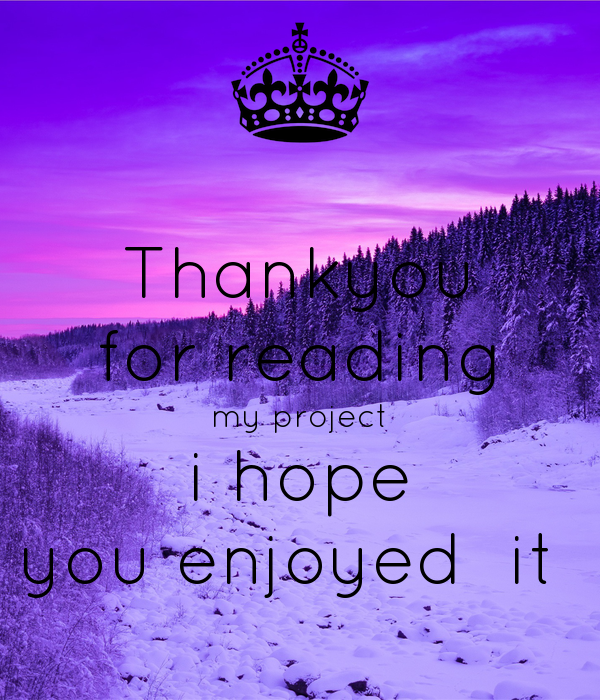